# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
pd.options.display.max_columns = None
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read data using pandas

In [2]:
raw_data = pd.read_csv('Final_Employee_Attrition.csv')
raw_data.head()
raw_data.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410.000000,4410,4410.000000,4410,4410,4410.000000,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,NaN,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3699,3129,2883,NaN,NaN,1818,NaN,NaN,2646,NaN,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,2205.500000,NaN,2.063946,NaN,NaN,65029.312925,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,1273.201673,NaN,1.106689,NaN,NaN,47068.888559,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,1.000000,NaN,NaN,10090.000000,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,1103.250000,NaN,1.000000,NaN,NaN,29110.000000,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,2205.500000,NaN,2.000000,NaN,NaN,49190.000000,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,3307.750000,NaN,3.000000,NaN,NaN,83800.000000,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [3]:
##Over18 , StandardHours , EmployeeCount
raw_data.head(20)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,Research Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,Sales Executive,Married,31430,2.0,Y,22,8,3,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,Laboratory Technician,Married,20440,0.0,Y,21,8,0,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5,2.0,1.0,3.0,3,3


# Drop unwanted columns and null values

In [4]:
# there are no null values
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [5]:
102/4410

0.02312925170068027

In [6]:
raw_data1 = raw_data.drop(['Over18','StandardHours','EmployeeCount'], axis = 1)
raw_data1 = raw_data1.dropna(axis = 0)

In [7]:
raw_data1.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300,4300,4300,4300.000000,4300.000000,4300,4300.000000,4300,4300.000000,4300,4300,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,2,NaN,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3605,3051,2807,NaN,NaN,1766,NaN,2571,NaN,956,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.926977,NaN,NaN,NaN,9.197907,2.913256,NaN,2211.695116,NaN,2.066977,NaN,NaN,65059.844186,2.690000,15.210698,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,NaN,NaN,NaN,8.097059,1.024774,NaN,1272.117692,NaN,1.106633,NaN,NaN,47045.398914,2.495764,3.662777,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1110.750000,NaN,1.000000,NaN,NaN,29260.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,2215.500000,NaN,2.000000,NaN,NaN,49360.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,3314.250000,NaN,3.000000,NaN,NaN,83802.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000


# Converting required data into binary format including the dependant variable i.e. y

In [8]:
raw_data1['Attrition'] = raw_data1['Attrition'].map({'Yes':1, 'No':0})
#raw__data['Gender'] = raw__data['Gender'].map({'Male':1, 'Female':0})

In [9]:
raw_data1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [10]:
hist_data = raw_data1._get_numeric_data()

hist_data

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,6,2,1,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,10,1,2,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,17,4,3,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,2,5,4,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,10,1,5,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,4,3,4405,2,35390,1.0,18,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,0,5,4,4406,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,0,2,4,4407,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,0,25,2,4408,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4


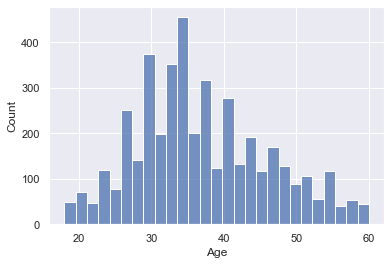

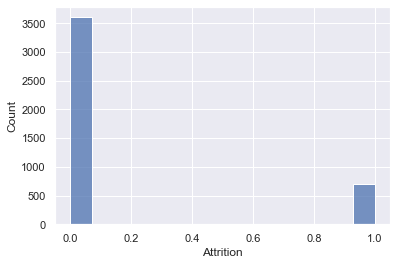

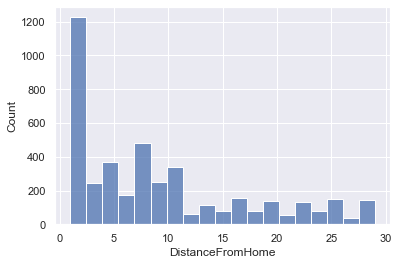

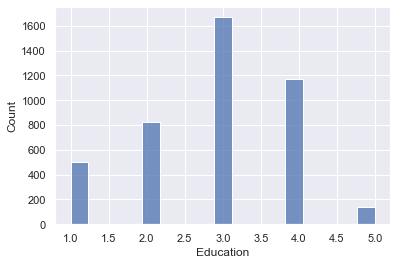

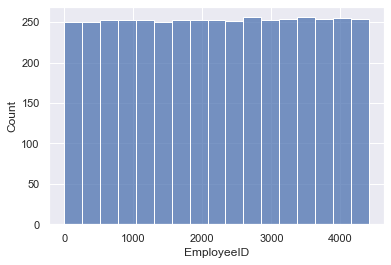

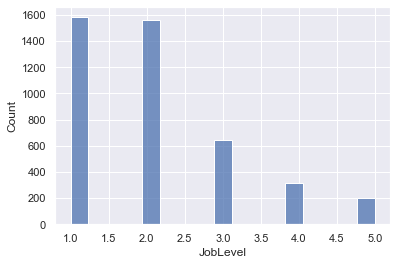

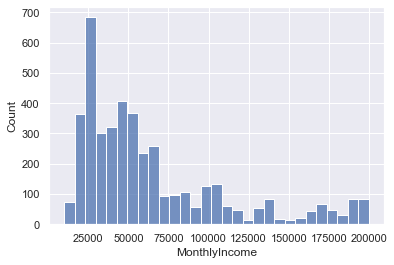

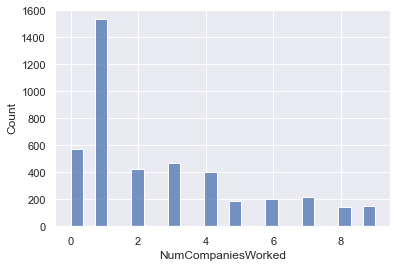

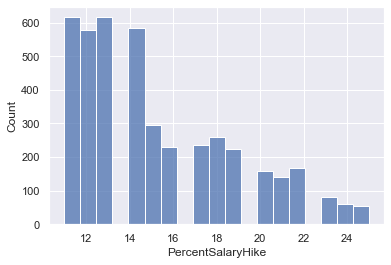

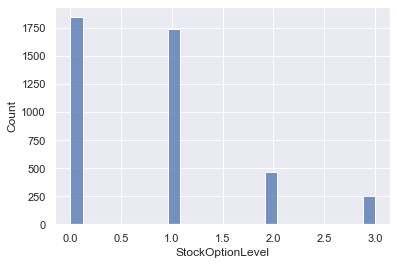

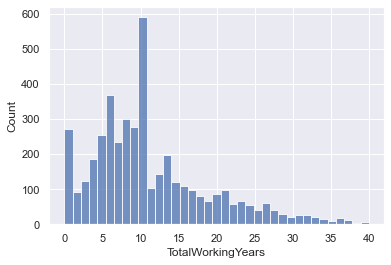

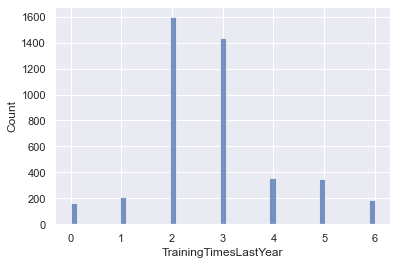

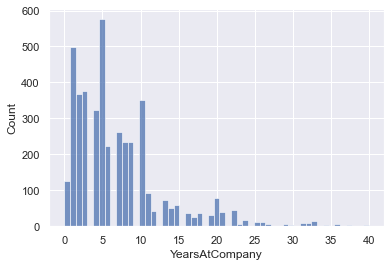

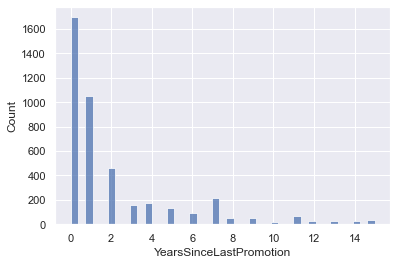

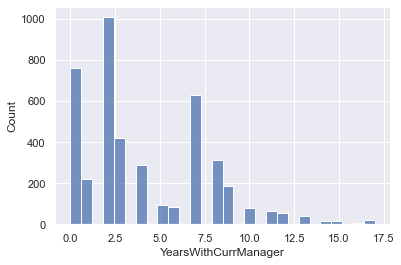

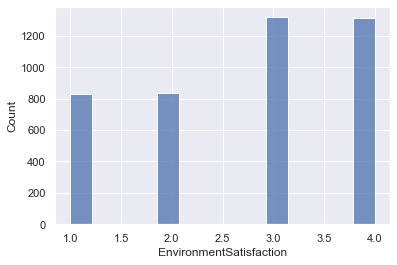

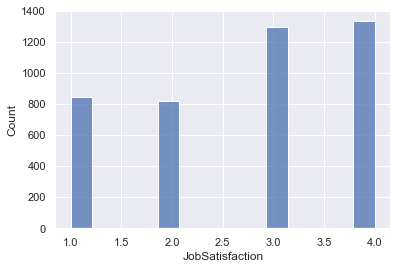

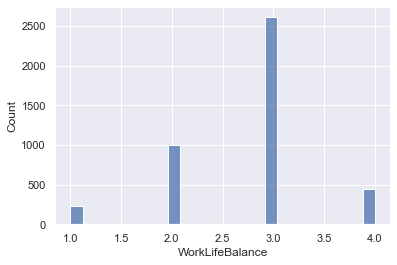

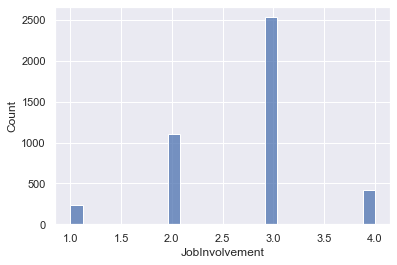

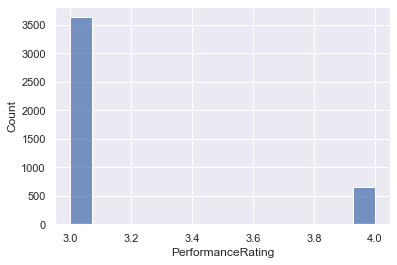

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
for i, col in enumerate(hist_data.columns):
    plt.figure(i)
    sns.histplot(hist_data[col])

In [12]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeID               4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   int64  
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   int64  
 13  NumCompaniesWorked       4300 non-null   float64
 14  PercentSalaryHike       

In [13]:
raw_data1 = raw_data1.astype({'Education':object})
raw_data1 = raw_data1.astype({'EnvironmentSatisfaction':object})
raw_data1 = raw_data1.astype({'JobSatisfaction':object})
raw_data1 = raw_data1.astype({'JobInvolvement':object})
raw_data1 = raw_data1.astype({'PerformanceRating':object})
raw_data1 = raw_data1.astype({'WorkLifeBalance':object})
raw_data1 = raw_data1.astype({'JobLevel':object})

In [14]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   object 
 6   EducationField           4300 non-null   object 
 7   EmployeeID               4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   object 
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   int64  
 13  NumCompaniesWorked       4300 non-null   float64
 14  PercentSalaryHike       

In [15]:
raw_data1['Education'].value_counts()

3    1670
4    1168
2     823
1     499
5     140
Name: Education, dtype: int64

In [16]:
raw_data1._get_numeric_data()



,Age,Attrition,DistanceFromHome,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,6,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,10,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,17,3,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,2,4,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,10,5,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,4,4405,35390,1.0,18,0,6.0,2,6,1,5
4405,42,0,5,4406,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,2,4407,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,25,4408,37020,0.0,20,0,5.0,4,4,1,2


In [17]:
raw_data1.info()['Dtype' == object]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   object 
 6   EducationField           4300 non-null   object 
 7   EmployeeID               4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   object 
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   int64  
 13  NumCompaniesWorked       4300 non-null   float64
 14  PercentSalaryHike       

TypeError: 'NoneType' object is not subscriptable

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


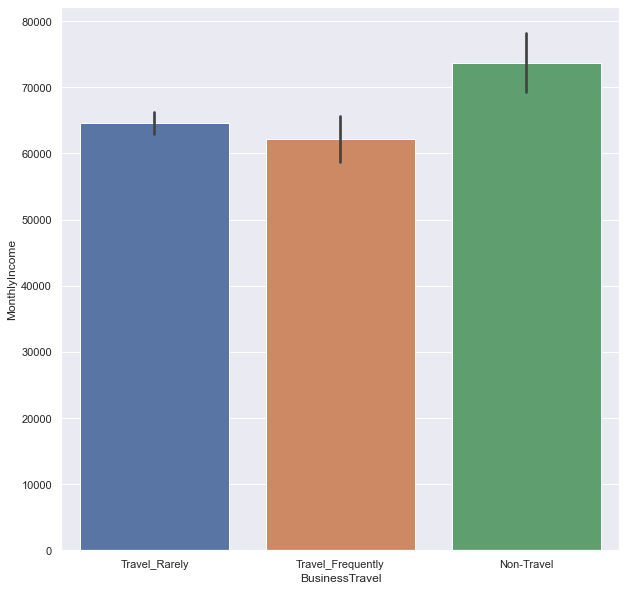

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


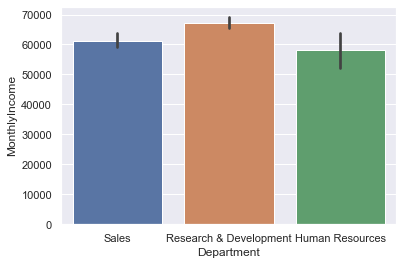

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


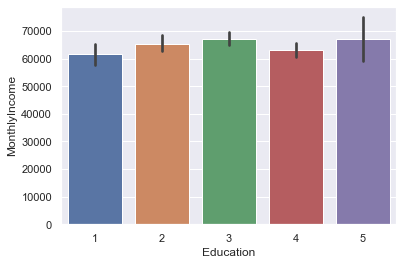

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


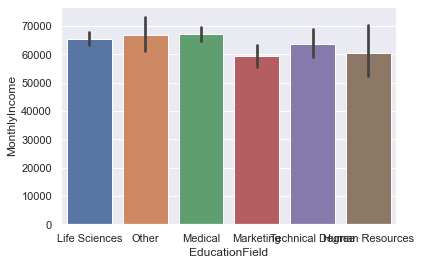

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


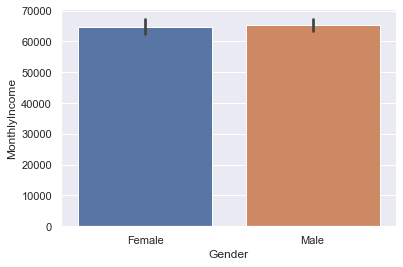

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


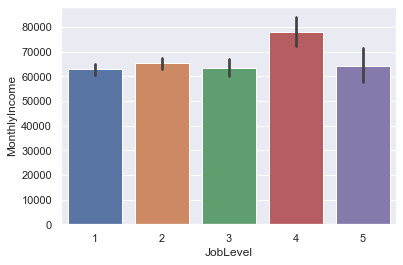

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


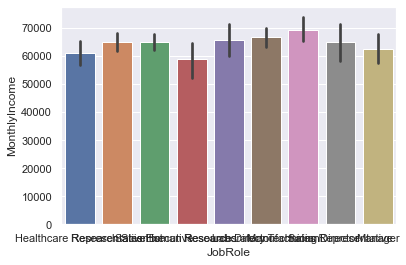

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


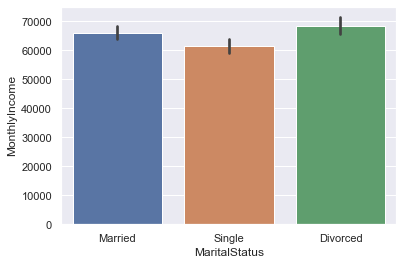

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


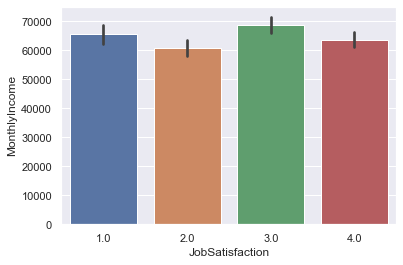

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


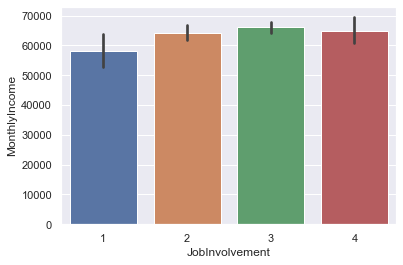

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


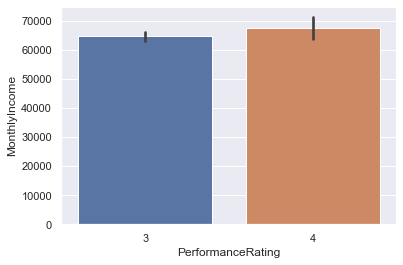

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (10,10))
sns.barplot('BusinessTravel','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('Department','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('Education','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('EducationField','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('Gender','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('JobLevel','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('JobRole','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('MaritalStatus','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('JobSatisfaction','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('JobInvolvement','MonthlyIncome',data = raw_data1)
plt.show()

sns.barplot('PerformanceRating','MonthlyIncome',data = raw_data1)
plt.show()

#sns.barplot('neighbourhood_group','price',data = data_cleaned1, hue = 'room_type')
#plt.show()

In [19]:
data_cleaned = raw_data1.drop(['EmployeeID'], axis = 1)

In [20]:
hist_data.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,-0.155584,0.004621,-0.034452,0.003651,-0.000781,-0.047256,0.303709,-0.034313,-0.030608,0.681213,-0.032032,0.314384,0.216554,0.204117,0.007983,0.000868,-0.024756,0.021284,-0.025059
Attrition,-0.155584,1.000000,-0.008314,-0.015237,-0.001707,-0.014587,-0.032629,0.043911,0.034425,-0.007971,-0.168637,-0.046239,-0.133612,-0.029931,-0.155420,-0.103485,-0.103098,-0.059817,-0.014705,0.026262
DistanceFromHome,0.004621,-0.008314,1.000000,-0.006369,0.003851,-0.038576,-0.019798,-0.016336,0.035857,0.007376,0.004364,-0.006383,0.030998,0.001888,0.020876,0.018882,-0.011494,0.009345,-0.007972,0.035974
Education,-0.034452,-0.015237,-0.006369,1.000000,-0.012041,0.043686,0.006381,-0.018156,-0.043592,0.000443,-0.008236,0.009327,0.008297,0.026970,0.007476,-0.044403,-0.005895,-0.005480,-0.020804,-0.035579
EmployeeID,0.003651,-0.001707,0.003851,-0.012041,1.000000,-0.002695,0.009136,-0.000349,-0.004508,-0.012503,-0.003896,-0.010225,0.000087,0.002201,0.005617,0.002042,0.000165,-0.005785,0.010275,-0.008336
JobLevel,-0.000781,-0.014587,-0.038576,0.043686,-0.002695,1.000000,0.045015,-0.008314,0.010119,0.002940,-0.035378,-0.032476,-0.064122,-0.058601,-0.053771,-0.023156,-0.018841,-0.022040,-0.015054,-0.001362
MonthlyIncome,-0.047256,-0.032629,-0.019798,0.006381,0.009136,0.045015,1.000000,-0.020110,0.008684,0.034453,-0.029776,0.044378,0.001878,0.063361,0.025514,-0.005380,0.003420,0.003702,0.028555,0.021096
NumCompaniesWorked,0.303709,0.043911,-0.016336,-0.018156,-0.000349,-0.008314,-0.020110,1.000000,0.030201,0.015965,0.240077,-0.030093,-0.115143,-0.033514,-0.107591,0.012443,-0.059525,-0.008871,0.026559,0.018649
PercentSalaryHike,-0.034313,0.034425,0.035857,-0.043592,-0.004508,0.010119,0.008684,0.030201,1.000000,0.012531,-0.021199,-0.035020,-0.027679,-0.028367,-0.039807,-0.003072,0.036671,-0.040252,-0.003603,0.773902
StockOptionLevel,-0.030608,-0.007971,0.007376,0.000443,-0.012503,0.002940,0.034453,0.015965,0.012531,1.000000,0.000556,-0.066810,0.008330,0.019924,0.017246,-0.005711,0.038806,-0.022785,0.009347,-0.037390


In [21]:
data_cleaned.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'], dtype=object)

In [22]:
from statsmodels.formula.api import logit

log_out = logit('Attrition ~ Age + BusinessTravel + Department + DistanceFromHome + Education + EducationField + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + NumCompaniesWorked + PercentSalaryHike + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + YearsAtCompany + YearsSinceLastPromotion +YearsWithCurrManager + EnvironmentSatisfaction + JobSatisfaction + WorkLifeBalance + JobInvolvement + PerformanceRating', data = data_cleaned).fit()


Optimization terminated successfully.
         Current function value: 0.355592
         Iterations 7


In [23]:
np.exp(-1529.0)

0.0

In [24]:
log_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4300
Model:                          Logit   Df Residuals:                     4247
Method:                           MLE   Df Model:                           52
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.1961
Time:                        01:26:53   Log-Likelihood:                -1529.0
converged:                       True   LL-Null:                       -1902.1
Covariance Type:            nonrobust   LLR p-value:                1.257e-123
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.8033      0.632      4.434      0.000       1.564       4.042
BusinessTravel[T.Travel_Frequently]      1.5332      0.210      7.313      0.000       1.122       1.944
BusinessTravel[T.Travel_Rarely]          0.7182      0.195      3.676      0.000       0.335       1.101
Department[T.Research & Development]    -0.5173      0.274     -1.889      0.059      -1.054       0.019
Department[T.Sales]                     -0.6026      0.288     -2.094      0.036      -1.167      -0.038
Education[T.2]                           0.0801      0.175      0.458      0.647      -0.263       0.423
Education[T.3]                          -0.1022      0.161     -0.634      0.526      -0.418       0.214
Education[T.4]                          -0.0735      0.168     -0.437      0.662      -0.403       0.256
Education[T.5]                          -0.5025      0.310     -1.623      0.105      -1.109       0.104
EducationField[T.Life Sciences]         -0.7610      0.379     -2.007      0.045      -1.504      -0.018
EducationField[T.Marketing]             -0.9840      0.416     -2.363      0.018      -1.800      -0.168
EducationField[T.Medical]               -0.8590      0.379     -2.265      0.023      -1.602      -0.116
EducationField[T.Other]                 -1.1973      0.427     -2.805      0.005      -2.034      -0.361
EducationField[T.Technical Degree]      -1.0601      0.407     -2.603      0.009      -1.858      -0.262
Gender[T.Male]                           0.0700      0.097      0.723      0.470      -0.120       0.260
JobLevel[T.2]                            0.0898      0.110      0.816      0.414      -0.126       0.306
JobLevel[T.3]                           -0.1079      0.147     -0.732      0.464      -0.397       0.181
JobLevel[T.4]                            0.0990      0.191      0.519      0.603      -0.275       0.473
JobLevel[T.5]                           -0.4857      0.259     -1.876      0.061      -0.993       0.022
JobRole[T.Human Resources]              -0.0802      0.307     -0.261      0.794      -0.683       0.522
JobRole[T.Laboratory Technician]         0.1865      0.199      0.937      0.349      -0.204       0.577
JobRole[T.Manager]                      -0.2690      0.254     -1.058      0.290      -0.767       0.229
JobRole[T.Manufacturing Director]       -0.3902      0.236     -1.656      0.098      -0.852       0.072
JobRole[T.Research Director]             0.6892      0.243      2.838      0.005       0.213       1.165
JobRole[T.Research Scientist]            0.3190      0.194      1.647      0.100      -0.061       0.699
JobRole[T.Sales Executive]               0.4145      0.194      2.138      0.032       0.035       0.794
JobRole[T.Sales Representative]         -0.0101      0.261     -0.039      0.969      -0.521       0.501
MaritalStatus[T.Married]                 0.2564      0.141      1.821      0.069      -0.02

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = log_out.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[208.0232191955936,
 2.3794374230516433,
 2.398619848885824,
 9.871475262289128,
 9.995803097146938,
 2.2123354072829486,
 2.754309159969374,
 2.5121382566284796,
 1.2900744626818679,
 23.946566988157855,
 10.927880918446899,
 21.604291528797663,
 5.9394106144878664,
 8.79000564636032,
 1.0376807460325963,
 1.3117298012506744,
 1.2327615947847832,
 1.1518701034198877,
 1.106436579066781,
 1.3880566900784093,
 2.5578149423566368,
 1.7267838762026528,
 1.9481897604107348,
 1.580149510005215,
 2.701733129812643,
 2.8399221357545996,
 1.5855883171046496,
 1.7197464508842955,
 1.7364687854078538,
 1.67609358407449,
 1.843009739781663,
 1.828708531055603,
 1.6351701587269876,
 1.8258797697634663,
 1.8278857450548123,
 4.166904209809055,
 4.885817815385004,
 2.6630627493790433,
 4.265122357627565,
 4.8669468488680385,
 2.5438084693816387,
 2.573758328861657,
 2.0657303360618533,
 1.0307335131362956,
 1.0501344826130903,
 1.2817752541914778,
 2.5847616187332223,
 1.0499518594477666,
 3.1894721

In [26]:
vif_df = pd.DataFrame()
vif_df["Features"] = log_out.params.index
vif_df

,Features
0,Intercept
1,BusinessTravel[T.Travel_Frequently]
2,BusinessTravel[T.Travel_Rarely]
3,Department[T.Research & Development]
4,Department[T.Sales]
5,Education[T.2]
6,Education[T.3]
7,Education[T.4]
8,Education[T.5]
9,EducationField[T.Life Sciences]


In [27]:
vif_df["VIF"] = vif
vif_df

,Features,VIF
0,Intercept,208.023219
1,BusinessTravel[T.Travel_Frequently],2.379437
2,BusinessTravel[T.Travel_Rarely],2.398620
3,Department[T.Research & Development],9.871475
4,Department[T.Sales],9.995803
5,Education[T.2],2.212335
6,Education[T.3],2.754309
7,Education[T.4],2.512138
8,Education[T.5],1.290074
9,EducationField[T.Life Sciences],23.946567


In [28]:
log_out.params

Intercept                               2.803264
BusinessTravel[T.Travel_Frequently]     1.533151
BusinessTravel[T.Travel_Rarely]         0.718161
Department[T.Research & Development]   -0.517329
Department[T.Sales]                    -0.602640
Education[T.2]                          0.080089
Education[T.3]                         -0.102239
Education[T.4]                         -0.073453
Education[T.5]                         -0.502477
EducationField[T.Life Sciences]        -0.760990
EducationField[T.Marketing]            -0.983957
EducationField[T.Medical]              -0.858955
EducationField[T.Other]                -1.197320
EducationField[T.Technical Degree]     -1.060122
Gender[T.Male]                          0.070017
JobLevel[T.2]                           0.089834
JobLevel[T.3]                          -0.107899
JobLevel[T.4]                           0.099005
JobLevel[T.5]                          -0.485733
JobRole[T.Human Resources]             -0.080210
JobRole[T.Laboratory

In [29]:
np.exp(log_out.params)

Intercept                               16.498412
BusinessTravel[T.Travel_Frequently]      4.632753
BusinessTravel[T.Travel_Rarely]          2.050658
Department[T.Research & Development]     0.596111
Department[T.Sales]                      0.547365
Education[T.2]                           1.083383
Education[T.3]                           0.902814
Education[T.4]                           0.929180
Education[T.5]                           0.605030
EducationField[T.Life Sciences]          0.467204
EducationField[T.Marketing]              0.373829
EducationField[T.Medical]                0.423605
EducationField[T.Other]                  0.302002
EducationField[T.Technical Degree]       0.346414
Gender[T.Male]                           1.072527
JobLevel[T.2]                            1.093992
JobLevel[T.3]                            0.897718
JobLevel[T.4]                            1.104071
JobLevel[T.5]                            0.615246
JobRole[T.Human Resources]               0.922923


In [30]:
log_out.pvalues[log_out.pvalues < 0.05]

Intercept                              9.265590e-06
BusinessTravel[T.Travel_Frequently]    2.616955e-13
BusinessTravel[T.Travel_Rarely]        2.370643e-04
Department[T.Sales]                    3.629761e-02
EducationField[T.Life Sciences]        4.473893e-02
EducationField[T.Marketing]            1.812721e-02
EducationField[T.Medical]              2.349347e-02
EducationField[T.Other]                5.034787e-03
EducationField[T.Technical Degree]     9.244778e-03
JobRole[T.Research Director]           4.544592e-03
JobRole[T.Sales Executive]             3.248458e-02
MaritalStatus[T.Single]                6.883381e-16
EnvironmentSatisfaction[T.2.0]         5.132382e-08
EnvironmentSatisfaction[T.3.0]         1.133033e-11
EnvironmentSatisfaction[T.4.0]         6.924946e-16
JobSatisfaction[T.2.0]                 1.610904e-05
JobSatisfaction[T.3.0]                 9.596036e-06
JobSatisfaction[T.4.0]                 1.414808e-16
WorkLifeBalance[T.2.0]                 2.489958e-06
WorkLifeBala

In [31]:
(log_out.pvalues < 0.05).value_counts()

True     28
False    25
dtype: int64

In [32]:
log_out.conf_int()

,0,1
Intercept,1.564034,4.042494e+00
BusinessTravel[T.Travel_Frequently],1.122237,1.944066e+00
BusinessTravel[T.Travel_Rarely],0.335237,1.101085e+00
Department[T.Research & Development],-1.054005,1.934677e-02
Department[T.Sales],-1.166820,-3.846097e-02
Education[T.2],-0.262529,4.227066e-01
Education[T.3],-0.418325,2.138471e-01
Education[T.4],-0.402925,2.560182e-01
Education[T.5],-1.109157,1.042037e-01
EducationField[T.Life Sciences],-1.504108,-1.787186e-02


In [33]:
log_out.conf_int(alpha = 0.05)

,0,1
Intercept,1.564034,4.042494e+00
BusinessTravel[T.Travel_Frequently],1.122237,1.944066e+00
BusinessTravel[T.Travel_Rarely],0.335237,1.101085e+00
Department[T.Research & Development],-1.054005,1.934677e-02
Department[T.Sales],-1.166820,-3.846097e-02
Education[T.2],-0.262529,4.227066e-01
Education[T.3],-0.418325,2.138471e-01
Education[T.4],-0.402925,2.560182e-01
Education[T.5],-1.109157,1.042037e-01
EducationField[T.Life Sciences],-1.504108,-1.787186e-02


In [34]:
np.exp(log_out.conf_int(alpha = 0.05))

,0,1
Intercept,4.778059,56.968235
BusinessTravel[T.Travel_Frequently],3.071718,6.987100
BusinessTravel[T.Travel_Rarely],1.398271,3.007428
Department[T.Research & Development],0.348539,1.019535
Department[T.Sales],0.311356,0.962269
Education[T.2],0.769104,1.526086
Education[T.3],0.658148,1.238433
Education[T.4],0.668362,1.291776
Education[T.5],0.329837,1.109827
EducationField[T.Life Sciences],0.222215,0.982287
